# **Pós Graduação Ciência de Dados - PUC Rio**
# **MVP Sprint I: Análise de Dados e Boas Práticas**
## Aluna: Simone de Fátima Marques Ramos

## **1. Introdução**

O metano (CH4) é um poderoso gás de efeito estufa e o segundo maior responsável pelo aquecimento global. Cada tonelada de metano tem 28 vezes mais potencial de esquentar o planeta em cem anos do que uma tonelada de dióxido de carbono (CO2), o maior causador da crise climática. 

• O metano é responsável por aproximadamente 30% do aumento da temperatura global, desde a revolução Industrial. O setor de energia – incluindo petróleo, gás natural, carvão e bioenergia – é responsável por quase 40% das emissões de metano da atividade humana.

• A concentração atmosférica do metano mais que dobrou desde os tempos pré-industriais. Felizmente ela é muito menor que a do CO2 - mede-se em partes
por bilhão de ar em vez de partes por milhão, caso do gás carbônico. O metano
também dura menos na atmosfera, aproximadamente 12 anos, contra 150 do CO2, daí ele ser classificado como um poluente climático de vida curta (SLCP).

• O metano também contribui para a formação de ozônio troposférico (O3
), que, como ele, é um gás de efeito estufa de curta duração, mas poderoso. O chamado ozônio de superfície também é um poluente do ar com
efeitos prejudiciais para a saúde humana, os ecossistemas e a agricultura

Reduções rápidas e sustentáveis nas emissões de metano são essenciais para limitar o aquecimento global a curto prazo e melhorar a qualidade do ar. 


**Outras fontes consultadas:**

ALENCAR, Ane et al. Desafios e Oportunidades para Redução das Emissões de Metano no Brasil, 2022 - Observatório do Clima 20 Anos

MACHADO, Naiara. Quatro passos para enfrentar o problema global do metano no O&G, 2022 - Agência EPBR (Consultado em https://epbr.com.br/)

Methane Tracker Base 2023 - https://www.iea.org/data-and-statistics/data-tools/methane-tracker-data-explorer

### **1.1. Problema de aprendizado supervisionado ou não supervisionado e Hipóteses sobre o problema**

Esse alto potencial de aquecimento e a menor duração na atmosfera fazem do metano
um bom alvo para políticas de redução imediata de emissões de gases de efeito estufa
que ajudem a humanidade a ganhar tempo para fazer a transição energética para uma
economia sem combustíveis fósseis e, assim, manter viva a meta do Acordo de Paris de
limitar o aquecimento da Terra a 1,5ºC em relação à era pré-industrial.

O Brasil é o quinto maior emissor de metano do mundo. Sozinho ele emite o
equivalente a 5,5% do metano do planeta, enquanto a participação do país nas
emissões gerais de gases de efeito estufa é de 3,3%. As emissões brasileiras em
2020 foram estimadas pelo Observatório do Clima em 21,7 milhões de toneladas em
2020, o que corresponde a 565 milhões de toneladas de CO2
 equivalente (MtCO2
e)
ou 26% das emissões totais de gases de efeito estufa do país. 


### **1.2. Definição do Problema** 


## **2. Importação de pacotes e bibliotecas**

In [1]:

import plotly.express as px

# Importando bibliotecas e pacotes que serão utilizados na análise

# Importação de Bibliotecas
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
from pandas import set_option
from pandas.plotting import scatter_matrix

# para tratamento de data
import datetime

# para tratamento de missings
import missingno as ms 

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## transformações numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

## transformações categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Versões das Bibliotecas utilizadas

pd_pd = pd.__version__
np_np = np.__version__
sns_sns = sns.__version__

print('Versões utilizadas na análise:')
print('Pandas = '+pd_pd)
print('Numpy = '+np_np)
print('Seaborn = '+sns_sns)

Versões utilizadas na análise:
Pandas = 1.5.3
Numpy = 1.22.4
Seaborn = 0.12.2


## **3. Carregamento dos dados**

In [3]:
# carregamento do dataset através da url do github

df = pd.read_csv('https://raw.githubusercontent.com/simonefmr/teste/main/global_emission_methane.csv')

### **3.1. Condições ou restrições impostas para selecionar os dados**

Não houve dificuldade de carregamento dos dados nem houve necessidade de tratamento especial em relação à separador ou alteração de encoding.
O dataset "Pandemic Details of World" foi obtidos através do diretório público Kaggle. A fonte de cada informação consta na coluna "Notes", que especifica o estudo e origem do dado.

In [4]:
# labels dos atributos do dataset

df.columns

Index(['Unnamed: 0', 'region', 'country', 'emissions', 'type', 'segment',
       'reason', 'baseYear', 'notes'],
      dtype='object')

### **3.2. Definição dos atributos**

**region:** região geográfica como continente, subcontinente ou visão mundo

**country:** país onde foi apurada as emissões

**emissions:** emissão de Metano em kt (kiloton)

**type:** setor da economia onde as emissões são geradas 

**Segment:** sub-setor da economia onde as emissões são geradas

**reason:** razão da emissão, pode ser "Fugitive" (não intencional), "Vented" (ventilado - liberado por razões de segurança) ou "Flared" (resíduo de queima incompleta que não é viável para venda e acaba sendo liberado na atmosfera). 

**baseYear:** base de ano onde houve o rastreio das emissões

**notes:** notas explicativas informando a fonte dos dados



## **4. Análise de Dados**

### **4.1. Limpeza preliminar dos dados**

In [5]:
# Elimino coluna "Unnamed" que não possui dados relevantes

df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Busco informações sobre contagem de não nulos e tipo de cada atributo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1550 non-null   object 
 1   country    1550 non-null   object 
 2   emissions  1548 non-null   float64
 3   type       1550 non-null   object 
 4   segment    1550 non-null   object 
 5   reason     1550 non-null   object 
 6   baseYear   1548 non-null   object 
 7   notes      1550 non-null   object 
dtypes: float64(1), object(7)
memory usage: 97.0+ KB


In [7]:
# Exibindo as primeiras linhas verifico que o dataset foi carregado corretamente

df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [8]:
# Exibindo as últimas linhas

df.tail()

,region,country,emissions,type,segment,reason,baseYear,notes
1545,World,World,NaN,Energy,Satellite-detected large oil and gas emissions,All,NaN,Not available
1546,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1547,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1548,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
1549,World,World,70758.710938,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [9]:
# Removendo valores referente à "Mundo" e "Total" para evitar duplicidade nos dados

df = df[df.region != 'World']

df.shape

(1526, 8)

### **4.2. Análise Descritiva**

In [10]:
# Resumo estatístico das emissões geradas

df.describe()



,emissions
count,1526.000000
mean,331.984226
std,1451.481353
min,0.000459
25%,2.588755
50%,22.501150
75%,114.979780
max,25372.222656


In [11]:
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [12]:
# Resumo estatístico das emissões geradas no triênio 2019-2021

df[df['baseYear']=='2019-2021'].describe()

,emissions
count,312.000000
mean,756.133279
std,2079.713788
min,0.051872
25%,23.579745
50%,143.009361
75%,620.715546
max,18501.914062


In [13]:
# Resumo estatístico das emissões geradas no ano 2022

df[df['baseYear']=='2022'].describe()

,emissions
count,1214.000000
mean,222.977220
std,1217.206963
min,0.000459
25%,1.645602
50%,14.140725
75%,68.814074
max,25372.222656


In [14]:
# Exibindo os dados únicos do atributo ANO BASE


df['baseYear'].unique()        # O dataset apresenta apenas duas variáveis de
                               # base temporal 2019-2021 (3 anos) e 2022.

array(['2019-2021', '2022'], dtype=object)

In [15]:
# Contagem de dados por tipo de emissão

df['type'].value_counts()

Energy         1214
Agriculture     104
Other           104
Waste           104
Name: type, dtype: int64

In [16]:
df['segment'].value_counts()

Total                                             410
Onshore oil                                       214
Gas pipelines and LNG facilities                  162
Offshore oil                                      156
Onshore gas                                       142
Offshore gas                                      116
Other from oil and gas                             97
Bioenergy                                          92
Other from coal                                    65
Steam coal                                         29
Coking coal                                        23
Satellite-detected large oil and gas emissions     20
Name: segment, dtype: int64

In [17]:
df['reason'].value_counts()

All         736
Fugitive    337
Vented      337
Flared      116
Name: reason, dtype: int64

In [18]:
temp=df[df['type']=='Energy']
temp.head()

,region,country,emissions,type,segment,reason,baseYear,notes
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,Not available


### **4.3. Tratamento de Missings**

In [19]:
# Contagem de nulos

df.isnull().sum()

region       0
country      0
emissions    0
type         0
segment      0
reason       0
baseYear     0
notes        0
dtype: int64

<Axes: >

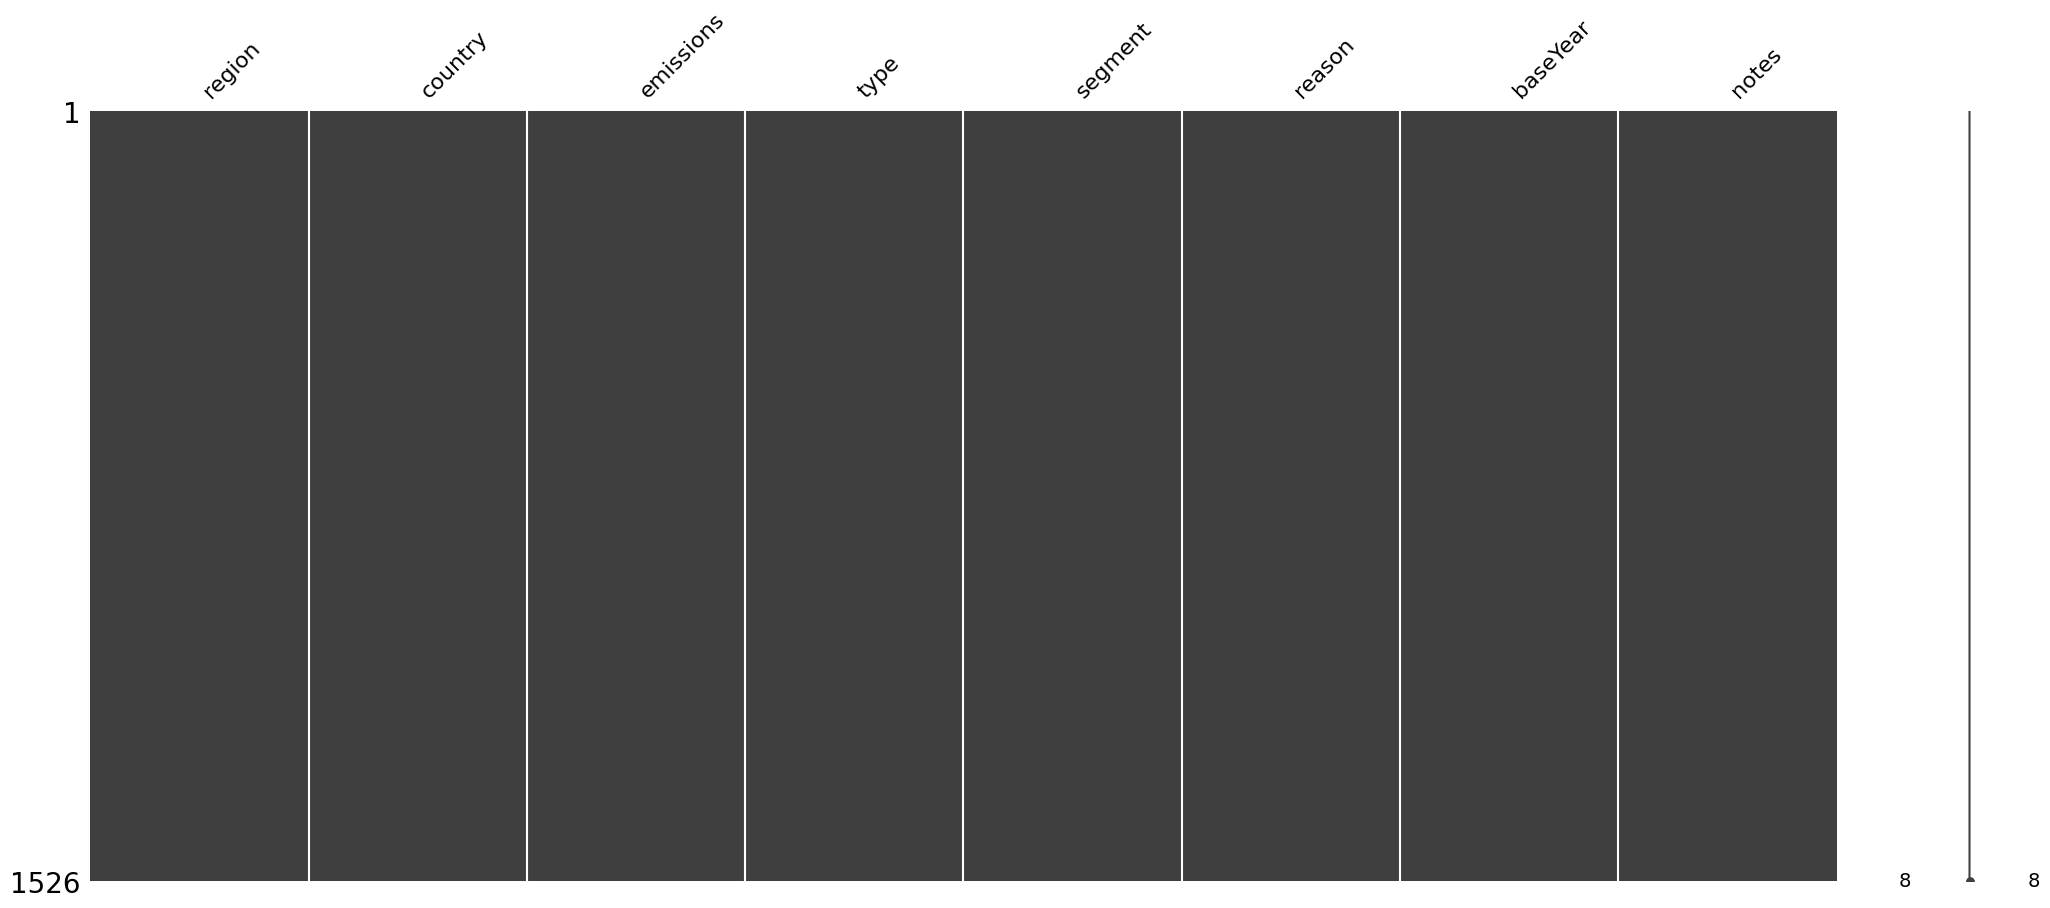

In [20]:

# Exibindo visualização matricial que evidencia a ausência de nulidade do dataset
# Neste caso não será preciso fazer ajustes de faltantes

ms.matrix(df)

In [21]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
dfSemMissings = df[col[:]]

# 
dfSemMissings = 


SyntaxError: ignored

In [ ]:
# exibindo as dimensões do dataset
print(df.shape)

# eliminando linhas que tenham ALGUM valor missing
dfSemMissings.dropna(how='any', inplace=True) # CUIDADO! Não fizemos uma cópia do dataset original!

# exibindo as dimensões do dataset
print(dfSemMissings.shape)

In [ ]:
# verificando novamente  nulls no dataset

dfSemMissings.isnull().sum()

## **5. Visualizações**

In [ ]:

# Plotando o gráfico Scatter Plot com Seaborn (IPI - FUMO)
plt.figure(figsize = (10,6))
sns.scatterplot(x='baseYear', y='emissi', data=ipi_sud);

In [ ]:
# Gráfico de linhas com Seaborn
plt.figure(figsize = (10,6))
sns.lineplot(data=ipi_sud.drop(['Ano'], axis=1));

In [ ]:
# Plotando boxplot com Seaborn para visualizacao do resultado das primeiras 100 linhas

# Selecao de colunas para a visualizacao
ipi_cols1 = ipi_sud[['IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

plt.figure(figsize = (15,10))
sns.boxplot(data=ipi_cols1[1:100]);

In [ ]:
# Grafico de correlacao com Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(ipi_cols1.corr(), annot=True, cmap= 'RdBu', vmin=-1, vmax=1, linewidths=3,linecolor='white');

In [ ]:

# Plotando pair plot 1 com Seaborn para visualizacao em uma so figura do histograma da diagonal principal e do scatterplot
sns.pairplot(ipi_cols1);

In [ ]:

# Plotando pair plot 2 com Seaborn configurando o parametro hue

# Selecao de colunas para a visualizacao
ipi_cols2 = ipi_sud[['UF', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

sns.pairplot(ipi_cols2, hue='UF');

In [ ]:

# Gráfico de barras: IPI - FUMO x UF
plt.bar(ipi_cols2['UF'], ipi_cols2['IPI - FUMO'])
plt.title('IPI - FUMO x Estado');

In [ ]:

# Histograma 
ipi_cols2.hist(figsize = (15,10))
plt.show()

In [ ]:

# Density Plot
ipi_cols2.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

In [ ]:
#Region wise segment analysis
px.sunburst(temp,values='emissions',path=['region','segment'],color='region',width=700,height=700)

In [ ]:
temp1=temp.groupby('segment').sum().reset_index()
temp1.sort_values('emissions',ascending=False,inplace=True)

In [ ]:
# Segment vs Emissions
px.bar(temp1,x='segment',y='emissions',color='segment',labels={'emissions':'Methane emission'})

In [ ]:
temp2=df.loc[np.where((temp2['segment']=='Total'))]
temp2.groupby('type').sum().reset_index()

In [ ]:
#Emission vs Type analysis
px.pie(temp2,values='emissions',names='type',hole=0.5)

In [ ]:
temp3=temp3.groupby(['segment','reason']).sum().reset_index()
temp3.drop(index=[18],inplace=True)

In [ ]:
#segment and Reason vs Emissions
px.bar(temp3,x='emissions',y='segment',color='reason')

## **6. Pré-processamento**

### **6.1. Divisão do dataset em conjunto de treino e teste**

### **6.2. Normalização e padronização**

Se a distribuição é normal, padronize. Caso contrário, normalize.

Os problemas de modelagem preditiva são muitas vezes complexos, não sendo clara a melhor transformação para realizar. Na dúvida, use a normalização. Se tiver tempo, explore os modelos com os dados sem transformação, com a padronização e com a normalização e veja se os resultados são significativamente diferentes e se o custo x benefício vale a pena.

Como a padronização resulta em valores positivos e negativos, pode ser interessante normalizar os dados após a padronização.

É possível definir os valores de mínimo e máximo de acordo com o conhecimento no negócio (e não simplesmente se ater aos valores observados).

In [ ]:
# Normalização

# Definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(dfSemMissings)
print(scaled)

In [ ]:
# Padronização 

# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(df)
print(scaled)

### **6.3. Transformações categóricas** 

In [ ]:
# separando o array em componentes de input e output

X = dataset.values[:,0:8]
y = dataset.values[:,8]

**Codificação Ordinal**

In [ ]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X)

#exibindo os datos transformados
print('Atributos transformados:')
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

**One-hot encoding**

In [ ]:
# one hot encode para os atributos X
encoded_X = OneHotEncoder(sparse=False).fit_transform(X)

#exibindo dados transformados
print('Atributos transformados:')
print(encoded_X[:5, :]) # 5 primeiras linhas e todas colunas

**Dummy Variable Encoding**

In [ ]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop='first', sparse=False)

# transformando os dados
dummy = encoder.fit_transform(data)
print(dummy)

## **Conclusão**

Assim, propomos que o Brasil adote uma meta de redução de 36% das suas
emissões de metano até 2030 quando comparado com 2020, sendo essa uma
contribuição significativa do país para meta do Compromisso Global do Metano
de redução de 30% das emissões de metano até 2030.
Para atingir essa meta é necessário, entre outras práticas, zerar o desmatamento
ilegal e o fogo associado a ele, reduzir o uso de lenha para cocção, controlar as
emissões fugitivas da indústria de petróleo e gás, recuperar pelo menos 50% de
todo metano gerado nos aterros sanitários, ampliar a recuperação de metano do
tratamento de resíduos animais, alcançar 30% de terminação intensiva do rebanho
bovinho de corte, conversão de 75% do cultivo de arroz para preparo antecipado e
cortar pela metade a prática de queima da palha de cana-de-açúcar ainda existente.
Essa meta pode ser alcançada com políticas regulatórias, de capacitação e de
incentivos econômicos nos setores público e priva 